In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('./data_for_drivers_analysis.csv')
data

,brand,id,satisfaction,trust,build,differs,easy,appealing,rewarding,popular,service,impact
0,1,98,3,1,0,1,1,1,0,0,1,0
1,1,179,5,0,0,0,0,0,0,0,0,0
2,1,197,3,1,0,0,1,1,1,0,1,1
3,1,317,1,0,0,0,0,1,0,1,1,1
4,1,356,4,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,10,17800,5,1,1,0,1,0,1,1,1,1
2549,10,17808,3,1,0,0,1,0,1,1,1,0
2550,10,17893,5,0,1,1,0,0,0,0,0,0
2551,10,17984,3,1,1,0,1,0,1,0,0,0


In [ ]:
data.describe()

,brand,id,satisfaction,trust,build,differs,easy,appealing,rewarding,popular,service,impact
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000
mean,4.857423,8931.480611,3.386604,0.549550,0.461810,0.334508,0.536232,0.451234,0.451234,0.536232,0.467293,0.330983
std,2.830096,5114.287849,1.172006,0.497636,0.498637,0.471911,0.498783,0.497714,0.497714,0.498783,0.499027,0.470659
min,1.000000,88.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4310.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,8924.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.000000,13545.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,18088.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

brand           0
id              0
satisfaction    0
trust           0
build           0
differs         0
easy            0
appealing       0
rewarding       0
popular         0
service         0
impact          0
dtype: int64

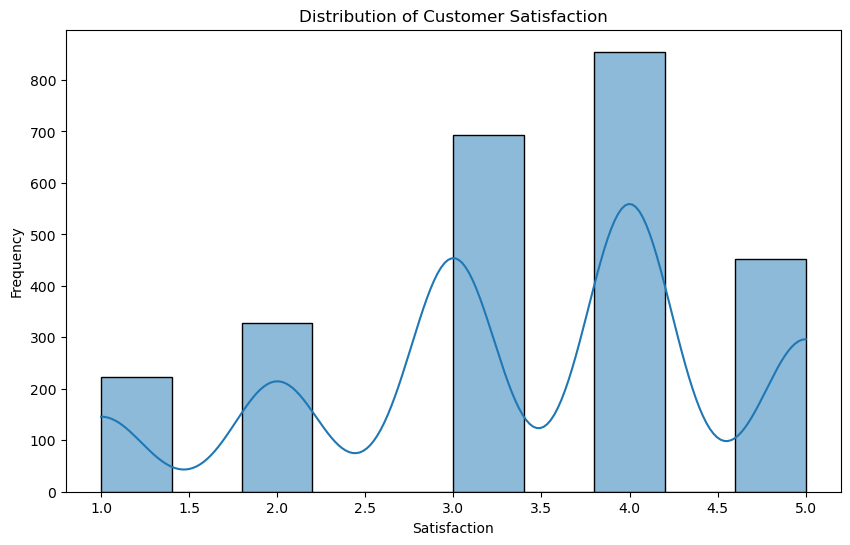

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['satisfaction'], kde=True, bins=10)
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Feature selection
features = ['trust', 'build', 'differs', 'easy', 'appealing', 'rewarding', 'popular', 'service', 'impact']
X = data[features]
y = data['satisfaction']


In [ ]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Calculate Pearson correlations
correlations = data.corr()
pearson_corr = correlations['satisfaction'][features]
print(pearson_corr)

trust        0.255706
build        0.191896
differs      0.184801
easy         0.212985
appealing    0.207997
rewarding    0.194561
popular      0.171425
service      0.251098
impact       0.254539
Name: satisfaction, dtype: float64


In [ ]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_scaled_with_constant = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled_with_constant).fit()
standardized_coefficients = model.params[1:]  # Exclude the intercept
print(standardized_coefficients)

x1    0.135635
x2    0.023411
x3    0.032631
x4    0.025744
x5    0.039647
x6    0.005937
x7    0.019470
x8    0.103573
x9    0.150482
dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Full model R-squared
full_model = LinearRegression().fit(X_scaled, y)
full_r2 = full_model.score(X_scaled, y)

usefulness = []
for feature in range(X_scaled.shape[1]):
    X_temp = np.delete(X_scaled, feature, axis=1)
    temp_model = LinearRegression().fit(X_temp, y)
    temp_r2 = temp_model.score(X_temp, y)
    usefulness.append(full_r2 - temp_r2)

print(usefulness)

[0.008243096643170134, 0.0002659202754857759, 0.0005503571557788911, 0.0002886049537902391, 0.0007095919425783581, 1.5743327233974647e-05, 0.00020422417231480416, 0.004673682536300738, 0.011202900306909735]


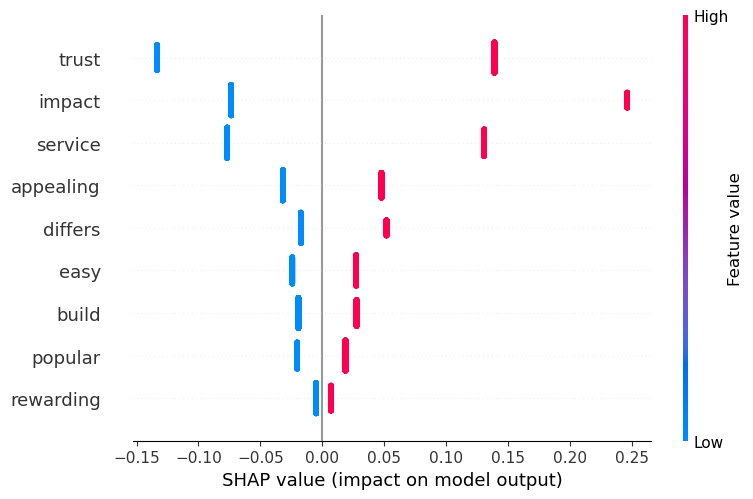

In [ ]:
import shap

# SHAP values for Linear Regression
explainer = shap.LinearExplainer(full_model, X_scaled)
shap_values = explainer.shap_values(X_scaled)
shap.summary_plot(shap_values, X_scaled, feature_names=features)

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0).fit(X_scaled, y)
relative_weights = np.square(ridge_model.coef_)
relative_weights = relative_weights / np.sum(relative_weights)
print(relative_weights)

[0.32827123 0.00980108 0.01902929 0.0118589  0.02807966 0.00063593
 0.00678067 0.19148051 0.40406272]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_
print(importances)

[0.15586537 0.10230144 0.08989693 0.09990365 0.08553448 0.10105692
 0.09494376 0.12966365 0.1408338 ]


In [ ]:
# Combine all results into a single DataFrame
results = pd.DataFrame({
    'Feature': features,
    'Pearson Corr': pearson_corr.values,
    'Standardized Coef': standardized_coefficients.values,
    'Usefulness': usefulness,
    'Shapley Values': np.mean(np.abs(shap_values), axis=0),
    'Johnson\'s Weights': relative_weights,
    'Gini Importance': importances
})

print(results)

     Feature  Pearson Corr  Standardized Coef  Usefulness  Shapley Values  \
0      trust      0.255706           0.135635    0.008243        0.136576   
1      build      0.191896           0.023411    0.000266        0.023157   
2    differs      0.184801           0.032631    0.000550        0.028857   
3       easy      0.212985           0.025744    0.000289        0.025924   
4  appealing      0.207997           0.039647    0.000710        0.039060   
5  rewarding      0.194561           0.005937    0.000016        0.005861   
6    popular      0.171425           0.019470    0.000204        0.019465   
7    service      0.251098           0.103573    0.004674        0.102030   
8     impact      0.254539           0.150482    0.011203        0.130708   

   Johnson's Weights  Gini Importance  
0           0.328271         0.155865  
1           0.009801         0.102301  
2           0.019029         0.089897  
3           0.011859         0.099904  
4           0.028080         

In [ ]:
# Normalize the correlations
normalized_corr = pearson_corr / pearson_corr.sum()
normalized_corr

trust        0.132834
build        0.099686
differs      0.096000
easy         0.110641
appealing    0.108050
rewarding    0.101071
popular      0.089052
service      0.130440
impact       0.132227
Name: satisfaction, dtype: float64

In [ ]:
# Normalize the coefficients
normalized_coefficients = standardized_coefficients / standardized_coefficients.sum()
normalized_coefficients

x1    0.252801
x2    0.043635
x3    0.060818
x4    0.047982
x5    0.073895
x6    0.011065
x7    0.036289
x8    0.193043
x9    0.280473
dtype: float64